In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [6]:
left = df[df.left==1]
left.shape

(3571, 10)

In [7]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [9]:
df.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

<AxesSubplot:xlabel='salary'>

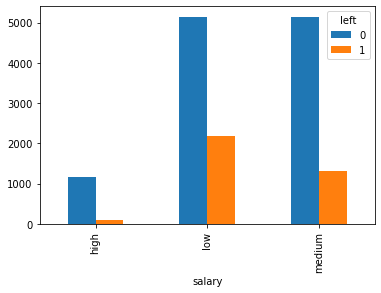

In [19]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')

<AxesSubplot:xlabel='Department'>

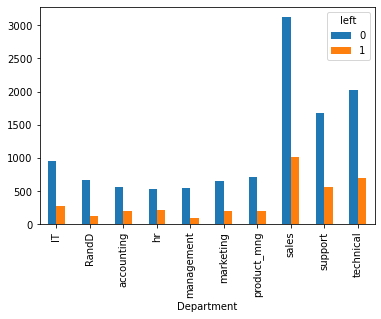

In [20]:
pd.crosstab(df.Department,df.left).plot(kind = 'bar')

In [25]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

In [26]:
salary_dummy = pd.get_dummies(subdf.salary)

In [27]:
salary_dummy

high  low  medium
0         0    1       0
1         0    0       1
2         0    0       1
3         0    1       0
4         0    1       0
...     ...  ...     ...
14994     0    1       0
14995     0    1       0
14996     0    1       0
14997     0    1       0
14998     0    1       0

[14999 rows x 3 columns]

In [28]:
dff = pd.concat([subdf,salary_dummy],axis =1)

In [29]:
dff

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                    0.38                   157                      0   
1                    0.80                   262                      0   
2                    0.11                   272                      0   
3                    0.72                   223                      0   
4                    0.37                   159                      0   
...                   ...                   ...                    ...   
14994                0.40                   151                      0   
14995                0.37                   160                      0   
14996                0.37                   143                      0   
14997                0.11                   280                      0   
14998                0.37                   158                      0   

       salary  high  low  medium  
0         low     0    1       0  
1      medium     0    0       1  
2      medium     0    0       1  
3         low     0    1       0  
4         low     0    1       0  
...       ...   ...  ...     ...  
14994     low     0    1       0  
14995     low     0    1       0  
14996     low     0    1       0  
14997     low     0    1       0  
14998     low     0    1       0  

[14999 rows x 7 columns]

In [32]:
dff.drop('salary',axis = 1 ,inplace = True)

In [33]:
dff

satisfaction_level  average_montly_hours  promotion_last_5years  high  \
0                    0.38                   157                      0     0   
1                    0.80                   262                      0     0   
2                    0.11                   272                      0     0   
3                    0.72                   223                      0     0   
4                    0.37                   159                      0     0   
...                   ...                   ...                    ...   ...   
14994                0.40                   151                      0     0   
14995                0.37                   160                      0     0   
14996                0.37                   143                      0     0   
14997                0.11                   280                      0     0   
14998                0.37                   158                      0     0   

       low  medium  
0        1       0  
1        0       1  
2        0       1  
3        1       0  
4        1       0  
...    ...     ...  
14994    1       0  
14995    1       0  
14996    1       0  
14997    1       0  
14998    1       0  

[14999 rows x 6 columns]

In [34]:
dff.drop('medium',axis = 1,inplace = True)

In [35]:
dff

satisfaction_level  average_montly_hours  promotion_last_5years  high  \
0                    0.38                   157                      0     0   
1                    0.80                   262                      0     0   
2                    0.11                   272                      0     0   
3                    0.72                   223                      0     0   
4                    0.37                   159                      0     0   
...                   ...                   ...                    ...   ...   
14994                0.40                   151                      0     0   
14995                0.37                   160                      0     0   
14996                0.37                   143                      0     0   
14997                0.11                   280                      0     0   
14998                0.37                   158                      0     0   

       low  
0        1  
1        0  
2        0  
3        1  
4        1  
...    ...  
14994    1  
14995    1  
14996    1  
14997    1  
14998    1  

[14999 rows x 5 columns]

In [36]:
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [37]:
model = linear_model.LogisticRegression()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X= dff

In [43]:
Y = df.left

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [49]:
model.fit(X_train,Y_train)

LogisticRegression()

In [50]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
model.score(X_test,Y_test)

0.7733333333333333